In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [17]:
data = pd.read_csv('BASIC_runs_time.csv', sep=';')
print(data.head())

   batch_size  early_stopping_patience  epochs layers    lr  model  \
0       256.0                      5.0    50.0  basic  0.01  BASIC   
1       256.0                      5.0    50.0  basic  0.01  BASIC   
2       256.0                      5.0    50.0  basic  0.01  BASIC   
3       256.0                      5.0    50.0  basic  0.01  BASIC   
4       256.0                      5.0    50.0  basic  0.01  BASIC   

   subset_percentage  train_acc  train_loss  val_acc  val_loss  time  
0                0.2      71.21       0.839    46.97     1.602   NaN  
1                0.2      67.53       0.900    50.01     1.484   NaN  
2                0.2      61.82       1.058    46.29     1.556   NaN  
3                0.2      64.60       0.988    50.77     1.438   NaN  
4                0.2      63.85       1.015    47.39     1.524   NaN  


In [18]:
grid_data = data.loc[data['subset_percentage'] == 0.5, :].copy()
grid_data.loc[:, 'acc_diff'] = grid_data['train_acc'] - grid_data['val_acc']
grid_data.loc[:, 'seconds'] = grid_data['time'].astype(str).str.split('.').apply(lambda x: int(x[0]) * 60 + int(x[1]))
grid_data

,batch_size,early_stopping_patience,epochs,layers,lr,model,subset_percentage,train_acc,train_loss,val_acc,val_loss,time,acc_diff,seconds
20,128.0,5.0,20.0,basic,0.00010,BASIC,0.5,33.36,1.830,33.05,1.832,17.52,0.31,1072
21,256.0,5.0,20.0,basic,0.00010,BASIC,0.5,33.46,1.813,33.04,1.815,19.04,0.42,1144
22,32.0,5.0,20.0,basic,0.00010,BASIC,0.5,32.90,1.809,33.02,1.813,20.02,-0.12,1202
23,64.0,5.0,20.0,basic,0.00010,BASIC,0.5,33.36,1.839,32.50,1.843,19.38,0.86,1178
24,128.0,5.0,20.0,basic,0.00100,BASIC,0.5,45.34,1.494,44.49,1.520,17.56,0.85,1076
25,256.0,5.0,20.0,basic,0.00100,BASIC,0.5,45.61,1.499,44.30,1.523,19.08,1.31,1148
26,32.0,5.0,20.0,basic,0.00100,BASIC,0.5,46.26,1.472,45.00,1.499,19.00,1.26,1140
27,64.0,5.0,20.0,basic,0.00100,BASIC,0.5,45.67,1.500,43.48,1.540,18.25,2.19,1105
28,128.0,5.0,20.0,basic,0.01000,BASIC,0.5,74.09,0.744,57.82,1.248,19.00,16.27,1140
29,256.0,5.0,20.0,basic,0.01000,BASIC,0.5,69.95,0.843,56.45,1.272,18.30,13.50,1083


batch_size
32.0     1216.00
64.0     1093.00
128.0    1453.00
256.0    1227.75
Name: seconds, dtype: float64

batch_size
32.0     125.910021
64.0     175.569549
128.0    714.679415
256.0    207.641317
Name: seconds, dtype: float64

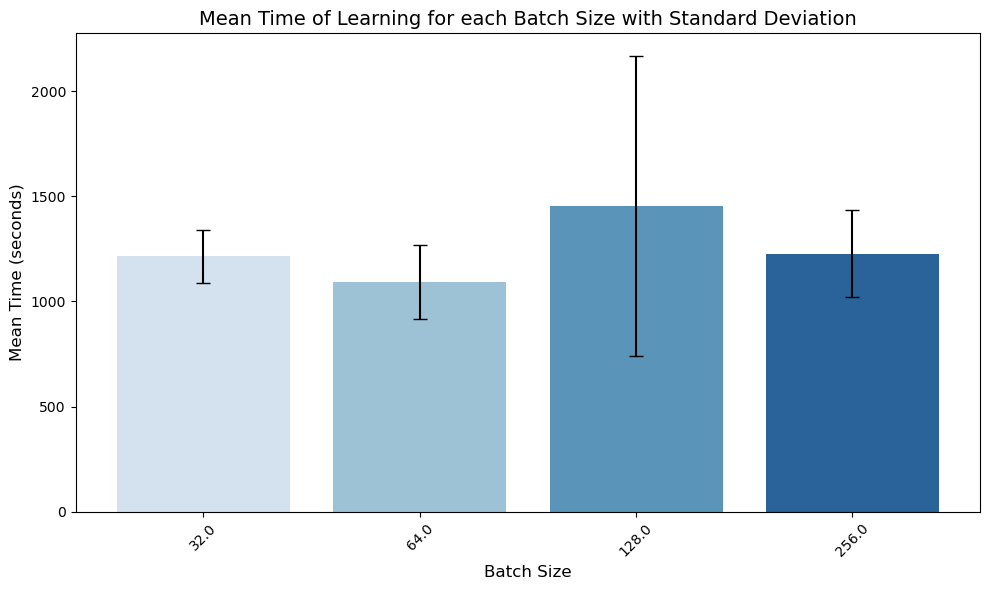

In [21]:
display(grid_data.groupby('batch_size')['seconds'].mean())
display(grid_data.groupby('batch_size')['seconds'].std())

# Aggregate data to calculate mean and std for each batch_size
agg_data = grid_data.groupby('batch_size')['seconds'].agg(['mean', 'std']).reset_index()

# Create the barplot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x='batch_size', 
    y='mean', 
    data=agg_data, 
    palette='Blues'
)

# Add error bars
for i, bar in enumerate(bar_plot.patches):
    # Get bar position and height
    x_pos = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    std_dev = agg_data.iloc[i]['std']
    
    # Add error bars
    plt.errorbar(x=x_pos, y=height, yerr=std_dev, color='black', capsize=5)

# Customize the plot
plt.title('Mean Time of Learning for each Batch Size with Standard Deviation', fontsize=14)
plt.xlabel('Batch Size', fontsize=12)
plt.ylabel('Mean Time (seconds)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


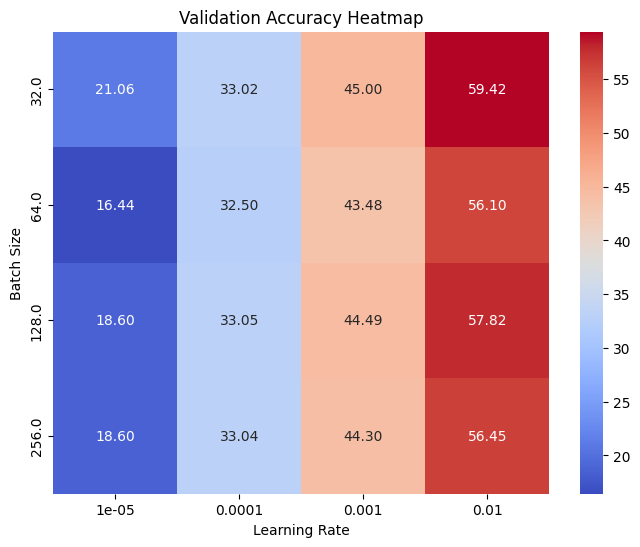

In [34]:
# Aggregate duplicates (e.g., by taking the mean val_acc)
data_agg = grid_data.groupby(['batch_size', 'lr'])['val_acc'].mean().reset_index()

# Pivot the table for the heatmap
heatmap_data = data_agg.pivot(index='batch_size', columns='lr', values='val_acc')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Validation Accuracy Heatmap")
plt.xlabel("Learning Rate")
plt.ylabel("Batch Size")
plt.show()

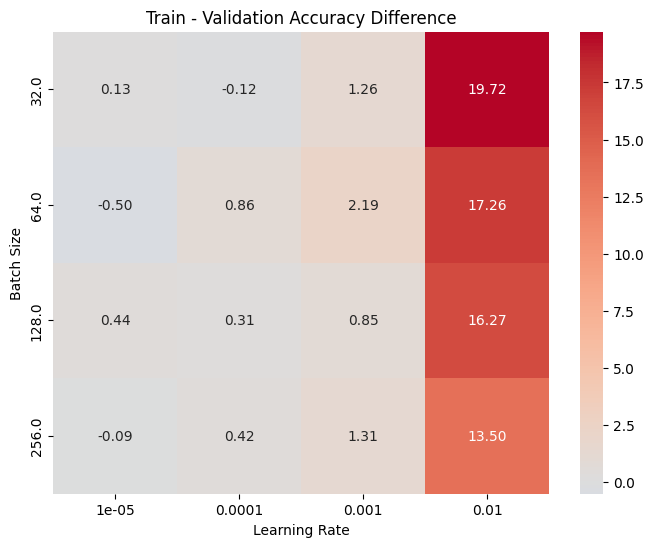

In [35]:
# Aggregate duplicates (e.g., by taking the mean of acc_diff)
data_agg = grid_data.groupby(['batch_size', 'lr'])['acc_diff'].mean().reset_index()

# Pivot the table for the heatmap
heatmap_data = data_agg.pivot(index='batch_size', columns='lr', values='acc_diff')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Train - Validation Accuracy Difference")
plt.xlabel("Learning Rate")
plt.ylabel("Batch Size")
plt.show()

## Stats Run

In [3]:
stat_data = pd.read_csv('BASIC_stats.csv')
stat_data['acc_diff'] = stat_data['train_acc'] - stat_data['val_acc']
stat_data

,augmentations,batch_size,dropout_rate,early_stopping_patience,epochs,layers,lr,model,subset_percentage,train_acc,train_loss,val_acc,val_loss,weight_decay,acc_diff
0,NaN,256.0,0.0,5.0,20.0,basic,0.01000,BASIC,0.5,68.89,0.885,56.87,1.223,0.0,12.02
1,NaN,256.0,0.0,5.0,20.0,basic,0.01000,BASIC,0.5,68.96,0.872,56.90,1.240,0.0,12.06
2,NaN,256.0,0.0,5.0,20.0,basic,0.01000,BASIC,0.5,67.84,0.922,56.41,1.238,0.0,11.43
3,NaN,256.0,0.0,5.0,20.0,basic,0.00100,BASIC,0.5,44.03,1.537,42.95,1.554,0.0,1.08
4,NaN,256.0,0.0,5.0,20.0,basic,0.00100,BASIC,0.5,44.84,1.517,43.35,1.546,0.0,1.49
5,NaN,256.0,0.0,5.0,20.0,basic,0.00100,BASIC,0.5,45.12,1.508,43.71,1.545,0.0,1.41
6,NaN,256.0,0.0,5.0,20.0,basic,0.00010,BASIC,0.5,31.36,1.881,31.26,1.884,0.0,0.10
7,NaN,256.0,0.0,5.0,20.0,basic,0.00010,BASIC,0.5,32.72,1.841,32.59,1.843,0.0,0.13
8,NaN,256.0,0.0,5.0,20.0,basic,0.00010,BASIC,0.5,31.85,1.857,31.95,1.859,0.0,-0.10
9,NaN,256.0,0.0,5.0,20.0,basic,0.00001,BASIC,0.5,10.75,2.294,10.76,2.294,0.0,-0.01


---VALIDATION---


,batch_size,lr,mean,std
0,256.0,0.00001,14.276667,3.093903
1,256.0,0.00010,31.933333,0.665157
2,256.0,0.00100,43.336667,0.380175
3,256.0,0.01000,56.726667,0.274651


---TRAIN---


,batch_size,lr,mean,std
0,256.0,0.00001,14.246667,3.135958
1,256.0,0.00010,31.976667,0.688791
2,256.0,0.00100,44.663333,0.566068
3,256.0,0.01000,68.563333,0.627402


---DIFFERENCE---


,batch_size,lr,mean,std
0,256.0,0.00001,-0.030000,0.270555
1,256.0,0.00010,0.043333,0.125033
2,256.0,0.00100,1.326667,0.217332
3,256.0,0.01000,11.836667,0.352751


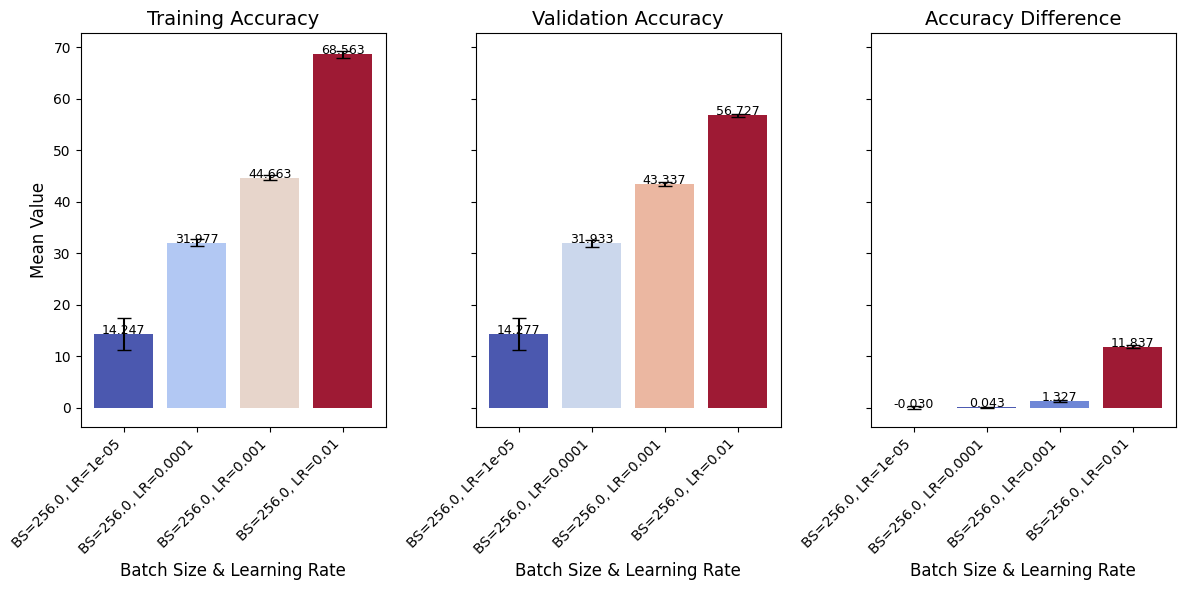

In [4]:
print('---VALIDATION---')
display(stat_data.groupby(['batch_size', 'lr'])['val_acc'].agg(['mean', 'std']).reset_index())
print('---TRAIN---')
display(stat_data.groupby(['batch_size', 'lr'])['train_acc'].agg(['mean', 'std']).reset_index())
print('---DIFFERENCE---')
display(stat_data.groupby(['batch_size', 'lr'])['acc_diff'].agg(['mean', 'std']).reset_index())

# Set up the figure - changed to horizontal layout (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
metrics = ['train_acc', 'val_acc', 'acc_diff']
titles = ['Training Accuracy', 'Validation Accuracy', 'Accuracy Difference']

# Process each metric
for i, (metric, title) in enumerate(zip(metrics, titles)):
    # Get aggregated data
    agg_data = stat_data.groupby(['batch_size', 'lr'])[metric].agg(['mean', 'std']).reset_index()
    
    # Create x-axis labels
    agg_data['group'] = agg_data.apply(lambda row: f"BS={row['batch_size']}, LR={row['lr']}", axis=1)
    
    # Normalize the mean values for color mapping
    norm = Normalize(vmin=agg_data['mean'].min(), vmax=agg_data['mean'].max())
    cmap = cm.get_cmap('coolwarm')
    colors = agg_data['mean'].apply(lambda x: cmap(norm(x))) 

    # Plot barplot with error bars
    ax = axes[i]
    bar_plot = sns.barplot(
        x='group', 
        y='mean', 
        data=agg_data,
        palette=colors,
        ax=ax
    )
    
    # Add error bars
    for j, bar in enumerate(bar_plot.patches):
        # Get bar position and height
        x_pos = bar.get_x() + bar.get_width()/2
        height = bar.get_height()
        std_dev = agg_data.iloc[j]['std']
        
        # Add error bars
        ax.errorbar(x=x_pos, y=height, yerr=std_dev, color='black', capsize=5)
    
    # Customize the plot
    ax.set_title(title, fontsize=14)
    
    # Set y-label only for the first plot
    if i == 0:
        ax.set_ylabel('Mean Value', fontsize=12)
    else:
        ax.set_ylabel('')
        
    ax.set_xlabel('Batch Size & Learning Rate', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add value labels on top of bars
    for j, p in enumerate(bar_plot.patches):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Regularization

In [6]:
data = pd.read_csv('BASIC_regularization_tuning.csv')
data['acc_diff'] = data['train_acc'] - data['val_acc']
# data = data.loc[data['weight_decay'] < 0.01, :]
print(data.head())

   batch_size  dropout_rate  early_stopping_patience  epochs layers    lr  \
0       256.0           0.2                      4.0    20.0  basic  0.01   
1       256.0           0.5                      4.0    20.0  basic  0.01   
2       256.0           0.8                      4.0    20.0  basic  0.01   
3       256.0           0.2                      4.0    20.0  basic  0.01   
4       256.0           0.5                      4.0    20.0  basic  0.01   

                  model  subset_percentage  train_acc  train_loss  val_acc  \
0  BASIC_regularization                0.5      50.01       1.368    52.69   
1  BASIC_regularization                0.5      39.67       1.606    43.71   
2  BASIC_regularization                0.5      20.60       2.003    20.40   
3  BASIC_regularization                0.5      52.70       1.304    53.87   
4  BASIC_regularization                0.5      40.02       1.611    43.04   

   val_loss  weight_decay  acc_diff  
0     1.301        0.0010     

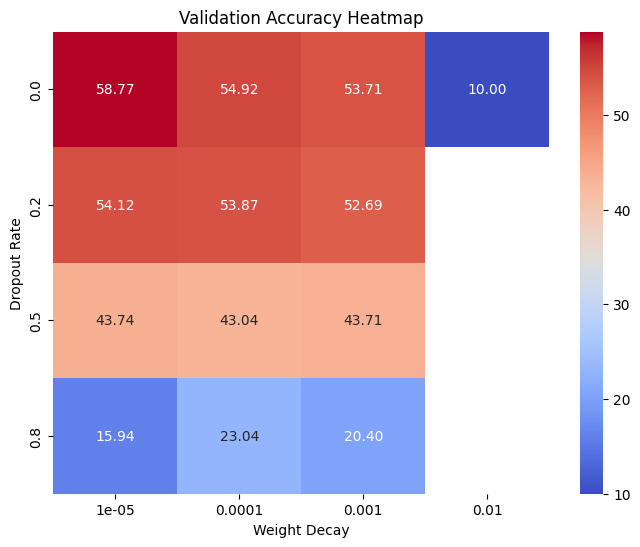

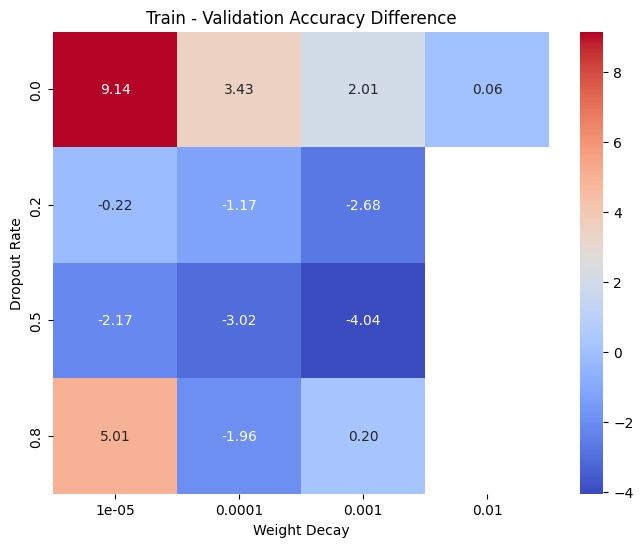

In [8]:
# Aggregate duplicates (e.g., by taking the mean val_acc)
data_agg = data.groupby(['dropout_rate', 'weight_decay'])['val_acc'].mean().reset_index()

# Pivot the table for the heatmap
heatmap_data = data_agg.pivot(index='dropout_rate', columns='weight_decay', values='val_acc')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Validation Accuracy Heatmap")
plt.xlabel("Weight Decay")
plt.ylabel("Dropout Rate")
plt.show()

# Aggregate duplicates (e.g., by taking the mean val_acc)
data_agg = data.groupby(['dropout_rate', 'weight_decay'])['acc_diff'].mean().reset_index()

# Pivot the table for the heatmap
heatmap_data = data_agg.pivot(index='dropout_rate', columns='weight_decay', values='acc_diff')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Train - Validation Accuracy Difference")
plt.xlabel("Weight Decay")
plt.ylabel("Dropout Rate")
plt.show()

## Reg_Stats

In [2]:
data = pd.read_csv('BASIC_regularization_stats.csv')
data['acc_diff'] = data['train_acc'] - data['val_acc']
# data = data.loc[data['weight_decay'] < 0.01, :]
print(data)

   batch_size  dropout_rate  early_stopping_patience  epochs layers    lr  \
0       256.0           0.2                      4.0    20.0  basic  0.01   
1       256.0           0.2                      4.0    20.0  basic  0.01   
2       256.0           0.2                      4.0    20.0  basic  0.01   
3       256.0           0.5                      4.0    20.0  basic  0.01   
4       256.0           0.5                      4.0    20.0  basic  0.01   
5       256.0           0.5                      4.0    20.0  basic  0.01   
6       256.0           0.8                      4.0    20.0  basic  0.01   
7       256.0           0.8                      4.0    20.0  basic  0.01   
8       256.0           0.8                      4.0    20.0  basic  0.01   

                  model  subset_percentage  train_acc  train_loss  val_acc  \
0  BASIC_regularization                0.5      52.16       1.307    54.14   
1  BASIC_regularization                0.5      55.47       1.222    56.4

---VALIDATION---


,dropout_rate,weight_decay,mean,std
0,0.2,0.00001,55.023333,1.239287
1,0.5,0.00001,37.006667,5.362708
2,0.8,0.00010,17.733333,1.625064


---TRAIN---


,dropout_rate,weight_decay,mean,std
0,0.2,0.00001,53.623333,1.687967
1,0.5,0.00001,39.140000,3.153141
2,0.8,0.00010,22.150000,2.260465


---DIFFERENCE---


,dropout_rate,weight_decay,mean,std
0,0.2,0.00001,-1.400000,0.521440
1,0.5,0.00001,2.133333,3.029213
2,0.8,0.00010,4.416667,0.930878


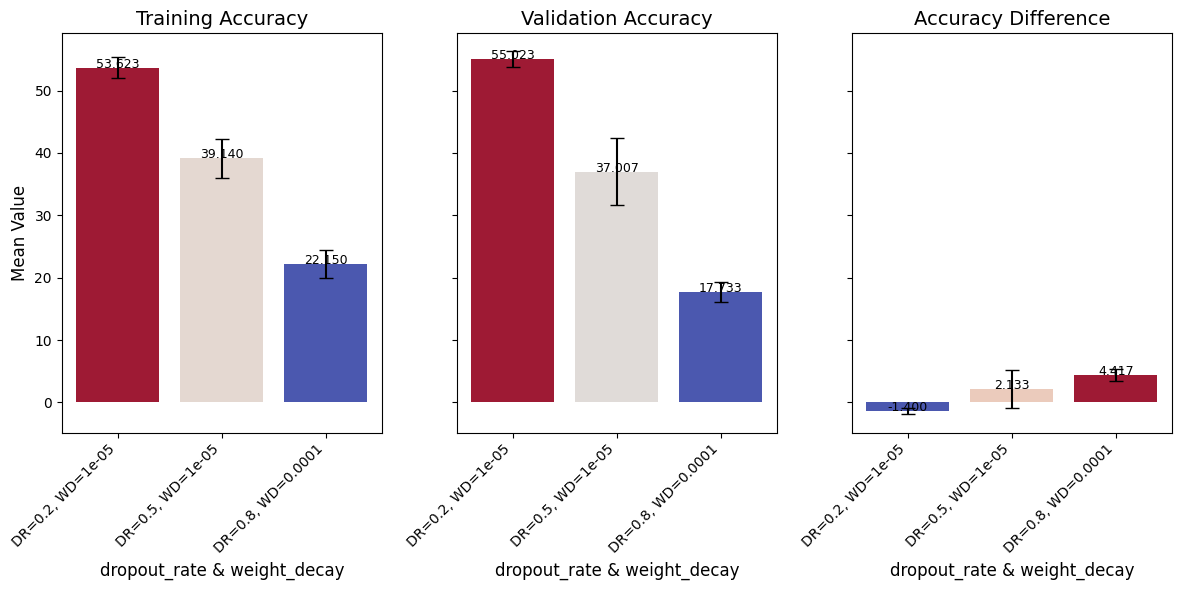

In [4]:
print('---VALIDATION---')
display(data.groupby(['dropout_rate', 'weight_decay'])['val_acc'].agg(['mean', 'std']).reset_index())
print('---TRAIN---')
display(data.groupby(['dropout_rate', 'weight_decay'])['train_acc'].agg(['mean', 'std']).reset_index())
print('---DIFFERENCE---')
display(data.groupby(['dropout_rate', 'weight_decay'])['acc_diff'].agg(['mean', 'std']).reset_index())

# Set up the figure - changed to horizontal layout (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
metrics = ['train_acc', 'val_acc', 'acc_diff']
titles = ['Training Accuracy', 'Validation Accuracy', 'Accuracy Difference']

# Process each metric
for i, (metric, title) in enumerate(zip(metrics, titles)):
    # Get aggregated data
    agg_data = data.groupby(['dropout_rate', 'weight_decay'])[metric].agg(['mean', 'std']).reset_index()
    
    # Create x-axis labels
    agg_data['group'] = agg_data.apply(lambda row: f"DR={row['dropout_rate']}, WD={row['weight_decay']}", axis=1)

    # Normalize the mean values for color mapping
    norm = Normalize(vmin=agg_data['mean'].min(), vmax=agg_data['mean'].max())
    cmap = cm.get_cmap('coolwarm')
    colors = agg_data['mean'].apply(lambda x: cmap(norm(x))) 

    # Plot barplot with error bars
    ax = axes[i]
    bar_plot = sns.barplot(
        x='group', 
        y='mean', 
        data=agg_data,
        palette=colors,
        ax=ax
    )
    
    # Add error bars
    for j, bar in enumerate(bar_plot.patches):
        # Get bar position and height
        x_pos = bar.get_x() + bar.get_width()/2
        height = bar.get_height()
        std_dev = agg_data.iloc[j]['std']
        
        # Add error bars
        ax.errorbar(x=x_pos, y=height, yerr=std_dev, color='black', capsize=5)
    
    # Customize the plot
    ax.set_title(title, fontsize=14)
    
    # Set y-label only for the first plot
    if i == 0:
        ax.set_ylabel('Mean Value', fontsize=12)
    else:
        ax.set_ylabel('')
        
    ax.set_xlabel('dropout_rate & weight_decay', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add value labels on top of bars
    for j, p in enumerate(bar_plot.patches):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [22]:
data = pd.read_csv('BASIC_regularization_stats.csv')
data['acc_diff'] = data['train_acc'] - data['val_acc']

print('---TRAIN---')
display(data.groupby(['dropout_rate', 'weight_decay'])['train_acc'].agg(['mean', 'std']).reset_index())
print('---VALIDATION---')
display(data.groupby(['dropout_rate', 'weight_decay'])['val_acc'].agg(['mean', 'std']).reset_index())
print('---DIFFERENCE---')
display(data.groupby(['dropout_rate', 'weight_decay'])['acc_diff'].agg(['mean', 'std']).reset_index())

---TRAIN---


,dropout_rate,weight_decay,mean,std
0,0.2,0.00001,53.623333,1.687967
1,0.5,0.00001,39.140000,3.153141
2,0.8,0.00010,22.150000,2.260465


---VALIDATION---


,dropout_rate,weight_decay,mean,std
0,0.2,0.00001,55.023333,1.239287
1,0.5,0.00001,37.006667,5.362708
2,0.8,0.00010,17.733333,1.625064


---DIFFERENCE---


,dropout_rate,weight_decay,mean,std
0,0.2,0.00001,-1.400000,0.521440
1,0.5,0.00001,2.133333,3.029213
2,0.8,0.00010,4.416667,0.930878


# Augmentation

In [25]:
data = pd.read_csv('BASIC_augmented_05.csv')
# Replace augmenations column NaN values with All Simple
data['augmentations'] = data['augmentations'].fillna('All Simple Augmentations')
data['acc_diff'] = data['train_acc'] - data['val_acc']
# data = data.loc[data['weight_decay'] < 0.01, :]
display(data)


,augmentations,batch_size,dropout_rate,early_stopping_patience,epochs,layers,lr,model,subset_percentage,train_acc,train_loss,val_acc,val_loss,weight_decay,acc_diff
0,RandomHorizontalFlip,256.0,0.2,4.0,20.0,basic,0.01,BASIC_augmented,0.5,55.35,1.220,55.96,1.205,0.00001,-0.61
1,RandomHorizontalFlip,256.0,0.2,4.0,20.0,basic,0.01,BASIC_augmented,0.5,53.38,1.288,54.35,1.249,0.00001,-0.97
2,RandomHorizontalFlip,256.0,0.2,4.0,20.0,basic,0.01,BASIC_augmented,0.5,52.34,1.318,53.57,1.272,0.00001,-1.23
3,RandomErasing,256.0,0.2,4.0,20.0,basic,0.01,BASIC_augmented,0.5,55.09,1.240,49.86,1.370,0.00001,5.23
4,RandomErasing,256.0,0.2,4.0,20.0,basic,0.01,BASIC_augmented,0.5,52.92,1.290,48.65,1.402,0.00001,4.27
5,RandomRotation,256.0,0.2,4.0,20.0,basic,0.01,BASIC_augmented,0.5,55.62,1.224,47.51,1.467,0.00001,8.11
6,RandomRotation,256.0,0.2,4.0,20.0,basic,0.01,BASIC_augmented,0.5,51.44,1.318,46.78,1.489,0.00001,4.66
7,RandomErasing,256.0,0.2,4.0,20.0,basic,0.01,BASIC_augmented,0.5,50.80,1.350,46.50,1.442,0.00001,4.30
8,RandomRotation,256.0,0.2,4.0,20.0,basic,0.01,BASIC_augmented,0.5,50.04,1.350,41.56,1.658,0.00001,8.48
9,RandomVerticalFlip,256.0,0.2,4.0,20.0,basic,0.01,BASIC_augmented,0.5,53.37,1.270,41.54,1.628,0.00001,11.83


C:\Users\Łukasz\AppData\Local\Temp\ipykernel_9312\2574572141.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_agg = data_agg.append({'augmentations': 'No Augmentation', 'mean': 55.023333, 'std': 1.239287}, ignore_index=True)


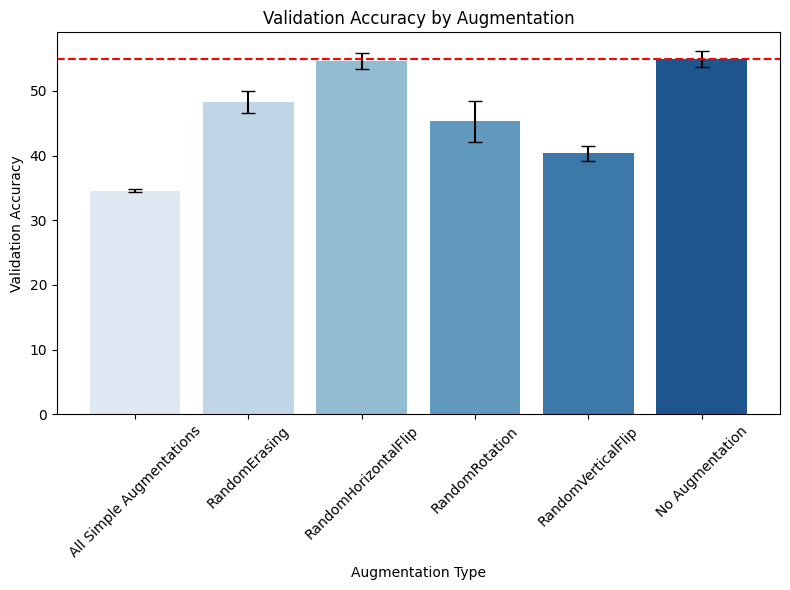

In [31]:

# Aggregate duplicates (e.g., by taking the mean val_acc)
data_agg = data.groupby(['augmentations'])['val_acc'].agg(['mean', 'std']).reset_index()

# Add the 55.023333	1.239287 to the data_agg DataFrame
data_agg = data_agg.append({'augmentations': 'No Augmentation', 'mean': 55.023333, 'std': 1.239287}, ignore_index=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.barplot(x='augmentations', y='mean', data=data_agg, palette='Blues')

for i, bar in enumerate(plt.gca().patches):
    # Get bar position and height
    x_pos = bar.get_x() + bar.get_width()/2
    height = bar.get_height()
    std_dev = data_agg.iloc[i]['std']
    # Add error bars
    plt.errorbar(x=x_pos, y=height, yerr=std_dev, color='black', capsize=5)
# add line for y=55.023333
plt.axhline(y=55.023333, color='r', linestyle='--', label='No Augmentation')
plt.title("Validation Accuracy by Augmentation")
plt.xlabel("Augmentation Type")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_9312\3349976507.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_agg = data_agg.append({'augmentations': 'No Augmentation', 'mean': -1.400000, 'std': 0.521440}, ignore_index=True)


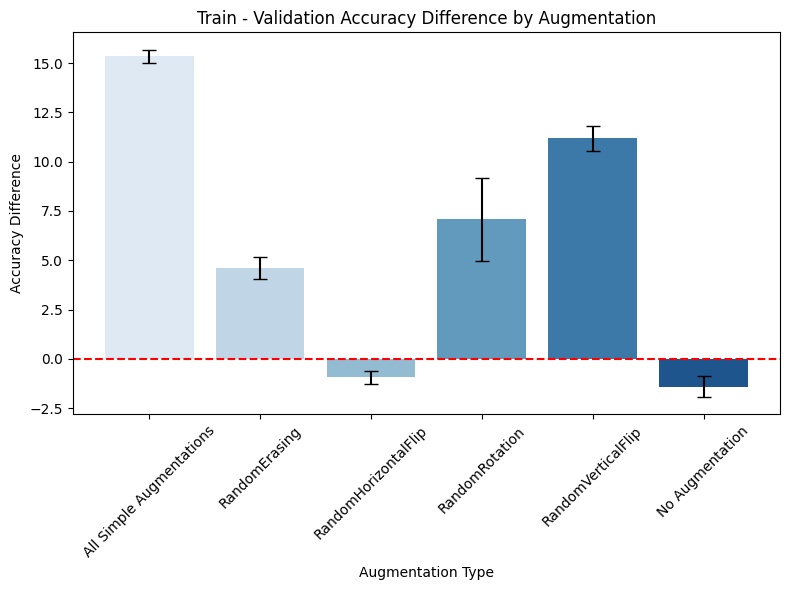

In [34]:
# Aggregate duplicates (e.g., by taking the mean val_acc)
data_agg = data.groupby(['augmentations'])['acc_diff'].agg(['mean', 'std']).reset_index()

# Add the -1.400000	0.521440 to the data_agg DataFrame
data_agg = data_agg.append({'augmentations': 'No Augmentation', 'mean': -1.400000, 'std': 0.521440}, ignore_index=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.barplot(x='augmentations', y='mean', data=data_agg, palette='Blues')

for i, bar in enumerate(plt.gca().patches):
    # Get bar position and height
    x_pos = bar.get_x() + bar.get_width()/2
    height = bar.get_height()
    std_dev = data_agg.iloc[i]['std']
    # Add error bars
    plt.errorbar(x=x_pos, y=height, yerr=std_dev, color='black', capsize=5)

plt.title("Train - Validation Accuracy Difference by Augmentation")
plt.xlabel("Augmentation Type")
plt.ylabel("Accuracy Difference")
plt.xticks(rotation=45)
plt.tight_layout()
# Line at y=0
plt.axhline(0, color='red', linestyle='--')
plt.show()